In [1]:
import math
from pathlib import Path
from os import listdir
from os.path import isfile, join
from random import choice, sample
from fastai.data.transforms import get_image_files
from fastai.vision.core import PILImage, PILMask
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 16 ,8

In [2]:
root_path = Path("/scratch/rc4499/hospital_systems")
mask_path = root_path/"masks_raw"

img_fnames = get_image_files(root_path/"imgs")
mask_fnames = get_image_files(mask_path)

In [6]:
my_sample = sample(img_fnames, 10)

In [4]:
def clean_mask(mask, kernel_size=(25, 25), blur_size=7, blur_iter=5, do_close=False):
    np_img = np.array(mask).astype(np.uint8)
    
    ret, np_img = cv2.threshold(np_img, 0.5, 255, cv2.THRESH_BINARY)
    orig = np.array(np_img)
    # https://stackoverflow.com/questions/37409811/smoothing-edges-of-a-binary-image/37458312
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    np_img = cv2.morphologyEx(np_img, cv2.MORPH_OPEN, kernel)
    if do_close:
        np_img = cv2.morphologyEx(np_img, cv2.MORPH_CLOSE, kernel)

    
    for i in range(blur_iter):
        # np_img = cv2.GaussianBlur(np_img, (7, 7), 0)
        np_img = cv2.medianBlur(np_img, blur_size)

    np_img = cv2.dilate(np_img, (5, 5), iterations=15)
    
    return mask, orig, np_img
    

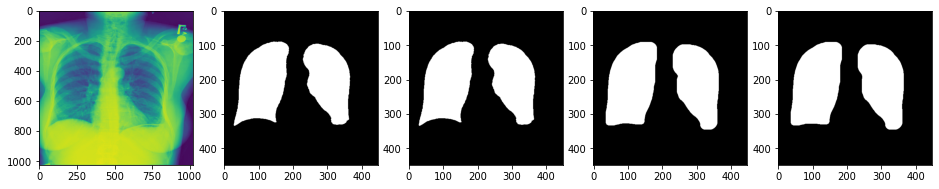

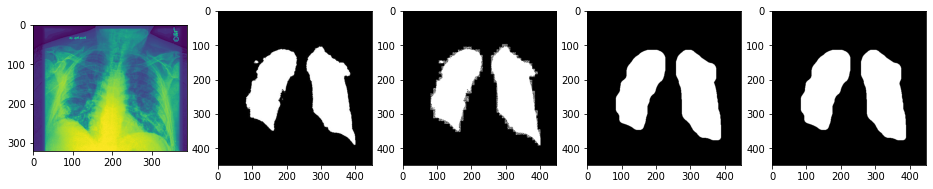

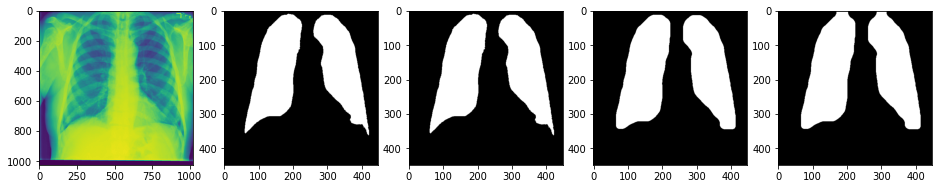

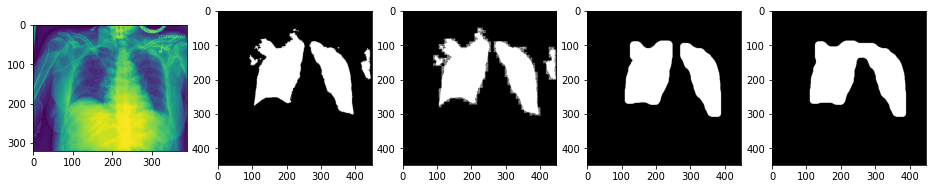

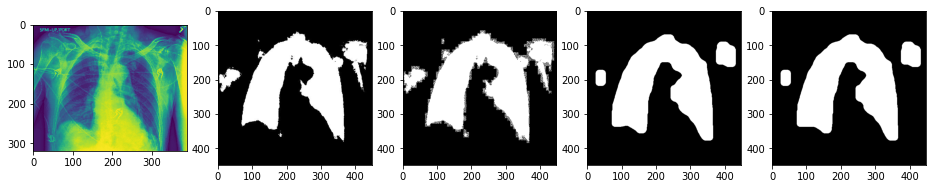

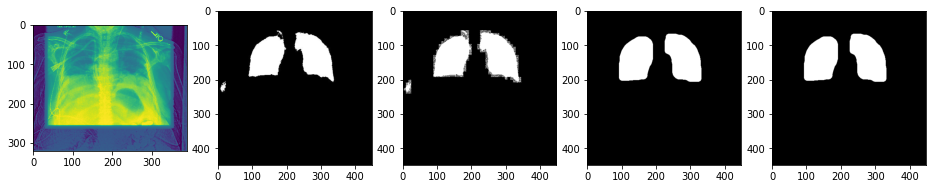

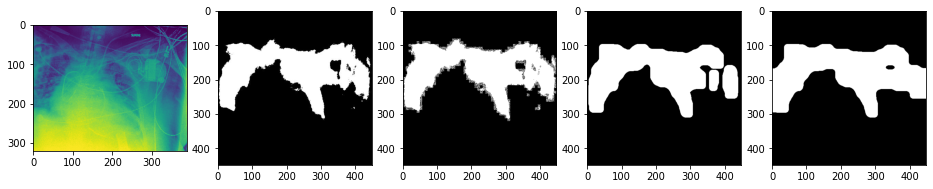

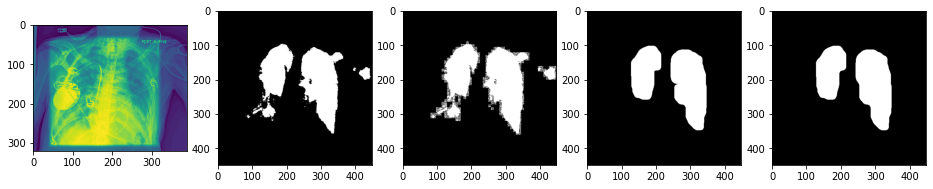

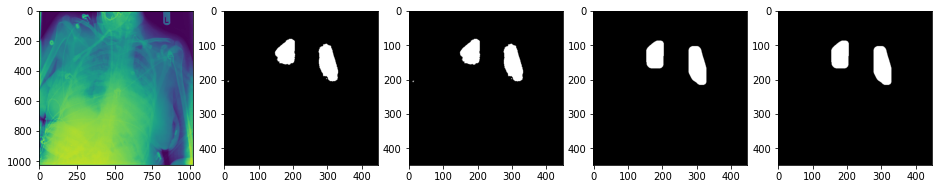

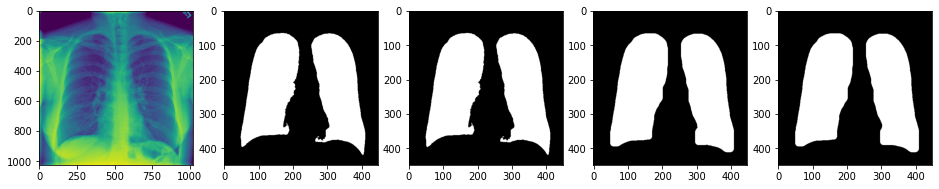

In [7]:
for img_path in my_sample:
    img_name = img_path.name
    img_mask = mask_path/img_name
    
    # read images
    img_A = mpimg.imread(img_path)
    img_B = mpimg.imread(img_mask)

    # display images
    fig, ax = plt.subplots(1,5)
    ax[0].imshow(img_A);
    mask, orig, clean_close = clean_mask(img_B, do_close=True)
    _, _, clean = clean_mask(img_B)
    ax[1].imshow(mask, cmap="gray")
    ax[2].imshow(orig, cmap="gray")
    ax[3].imshow(clean, cmap="gray")
    ax[4].imshow(clean_close, cmap="gray")

In [ ]:
mask_fname = choice(mask_fnames)
# mask_fname = mask_path/"CXR6_IM-2192-1001.png"
print(mask_fname)
img = PILMask.create(mask_fname)
img.show(figsize=(5,5))